# 합성곱 신경망을 사용한 이미지 분류

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/8-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 패션 MNIST 데이터 불러오기

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

## 합성곱 신경망 만들기

In [2]:
model = keras.Sequential()

In [3]:
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', 
                              input_shape=(28,28,1)))

In [4]:
model.add(keras.layers.MaxPooling2D(2))

In [5]:
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))

In [6]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

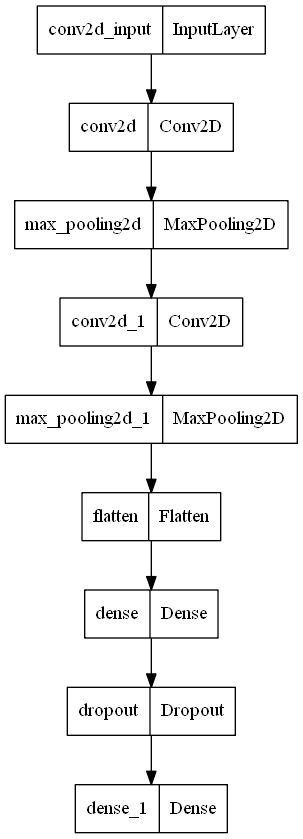

In [13]:
keras.utils.plot_model(model)

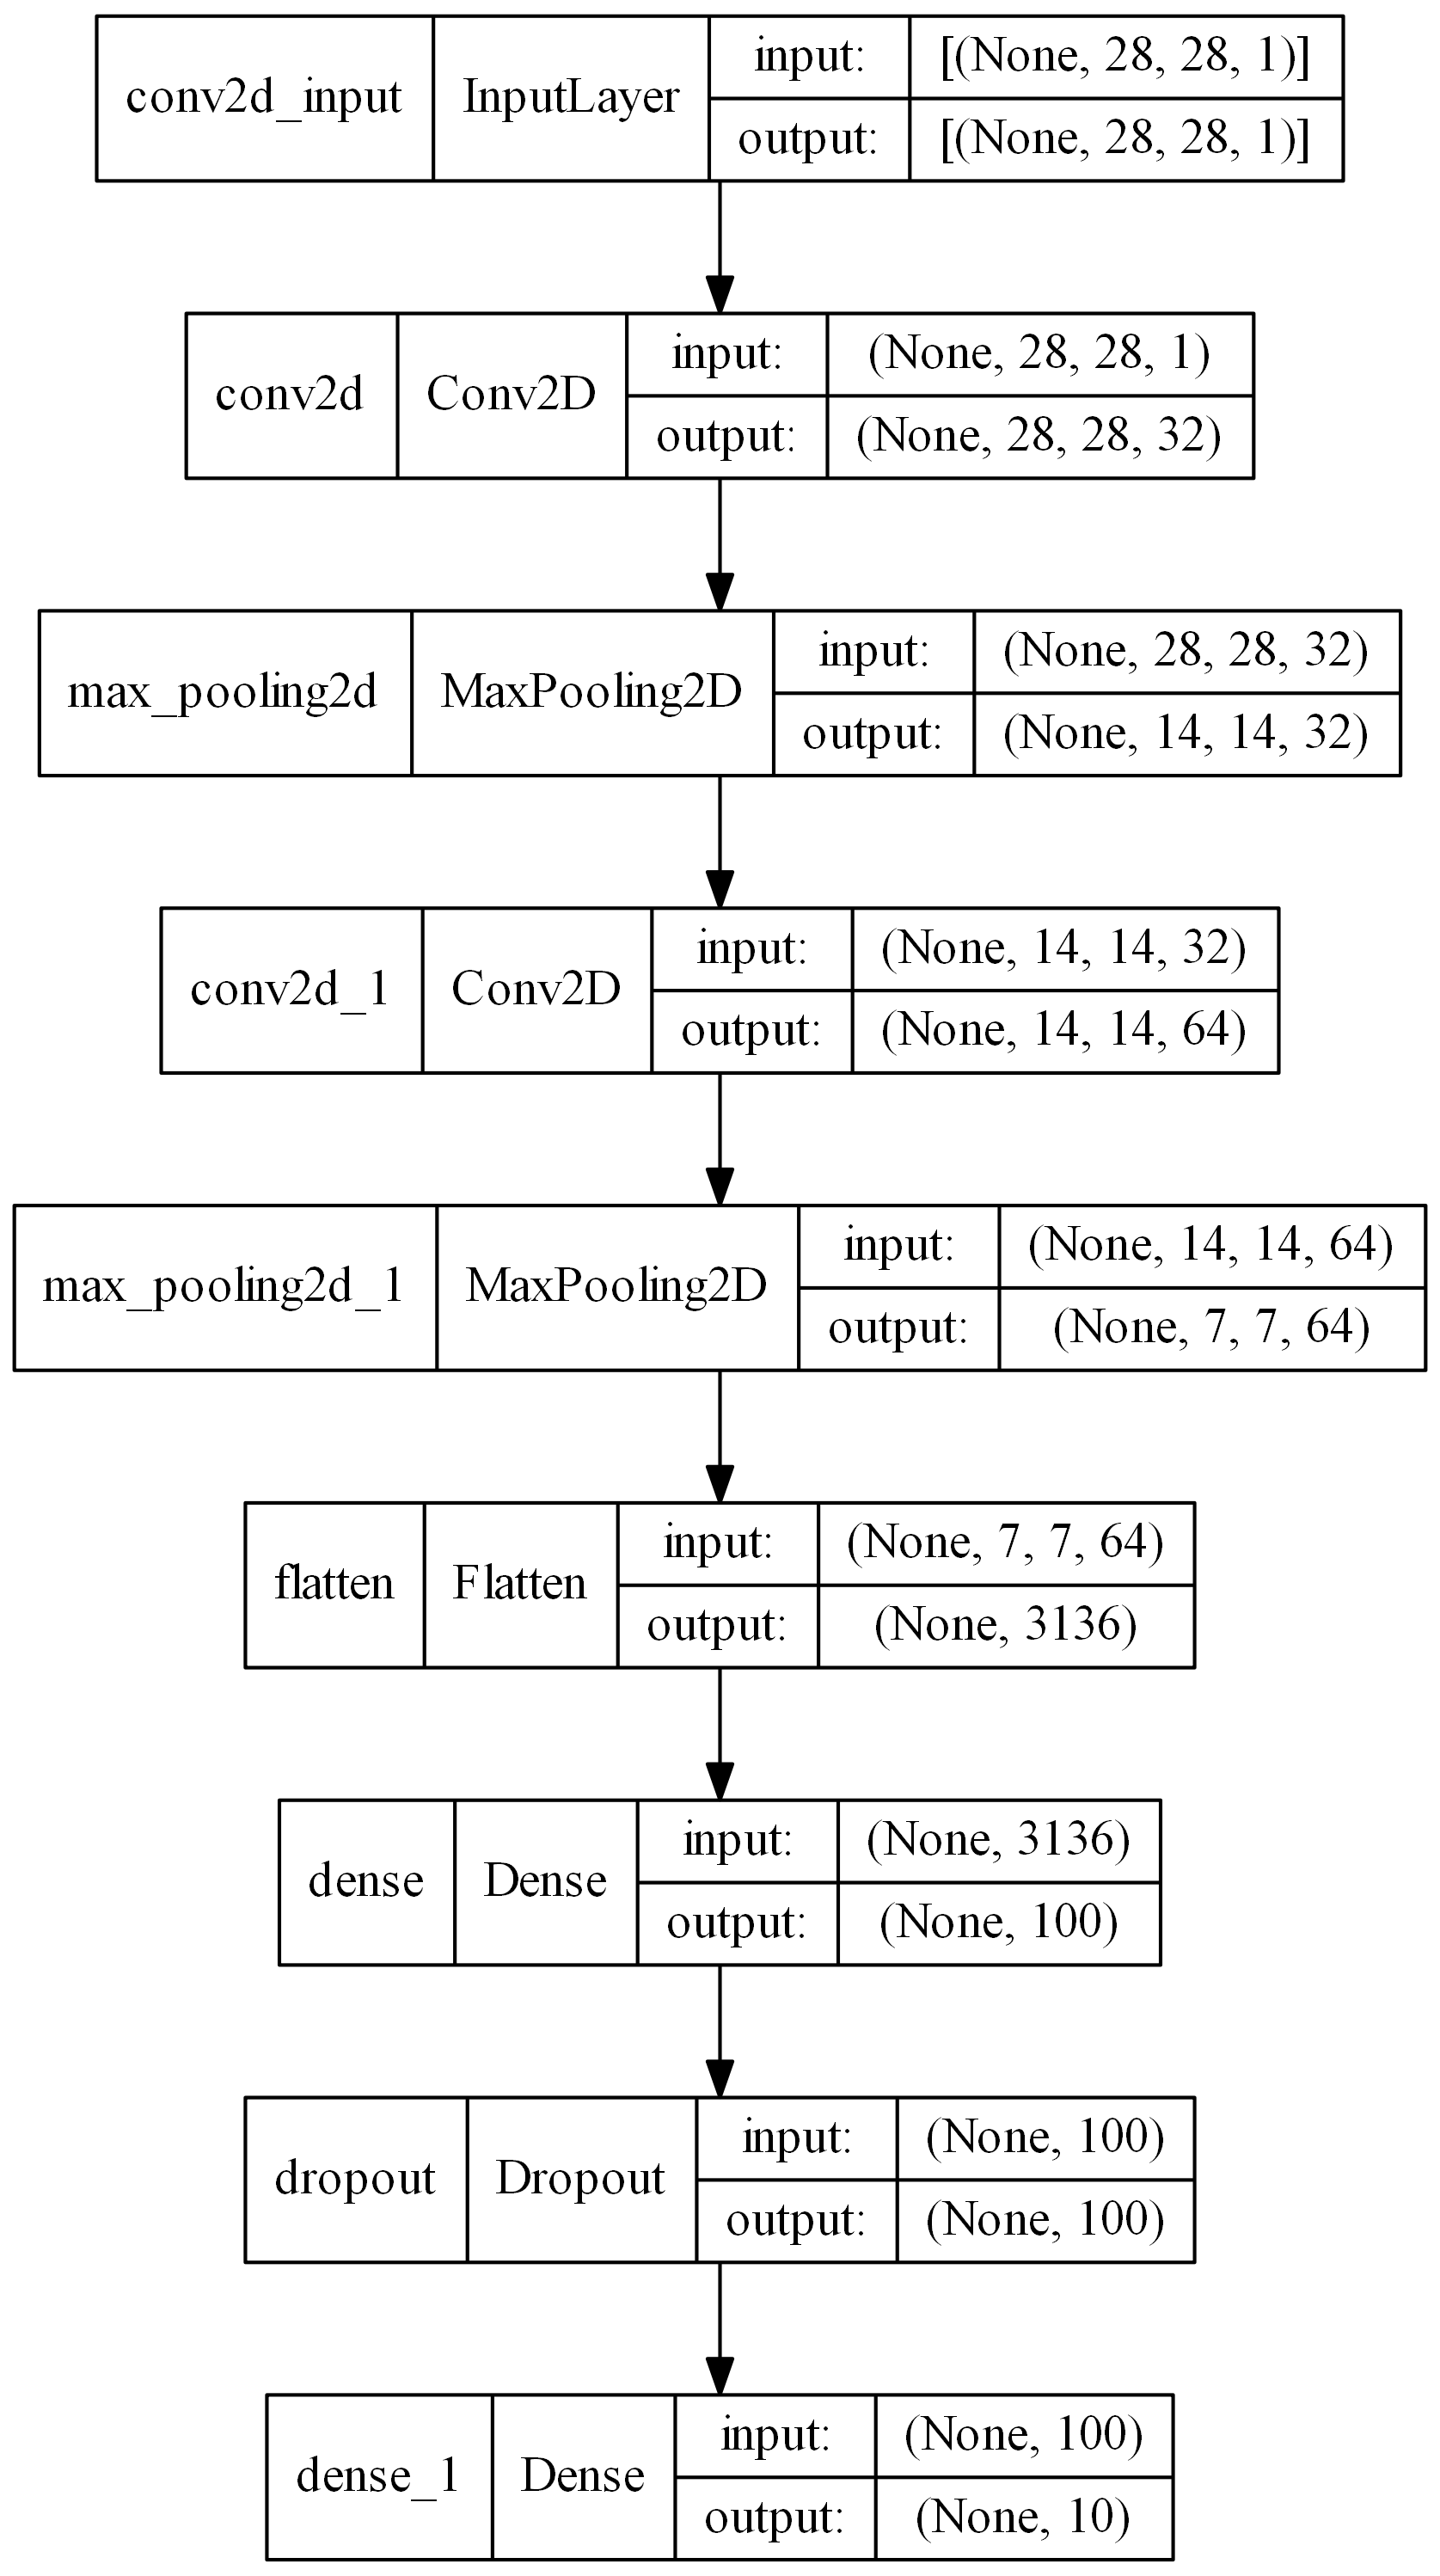

In [11]:
keras.utils.plot_model(model, show_shapes=True, to_file='cnn-architecture.png', dpi=300)

## 모델 컴파일과 훈련

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 48s 32ms/step - loss: 0.1923 - accuracy: 0.9291 - val_loss: 0.2362 - val_accuracy: 0.9168
Epoch 2/20
1500/1500 [==============================] - 46s 30ms/step - loss: 0.1782 - accuracy: 0.9314 - val_loss: 0.2331 - val_accuracy: 0.9171
Epoch 3/20
1500/1500 [==============================] - 44s 29ms/step - loss: 0.1681 - accuracy: 0.9361 - val_loss: 0.2253 - val_accuracy: 0.9232
Epoch 4/20
1500/1500 [==============================] - 42s 28ms/step - loss: 0.1565 - accuracy: 0.9405 - val_loss: 0.2258 - val_accuracy: 0.9221
Epoch 5/20
1500/1500 [==============================] - 41s 27ms/step - loss: 0.1444 - accuracy: 0.9440 - val_loss: 0.2285 - val_accuracy: 0.9212


In [14]:
import matplotlib.pyplot as plt

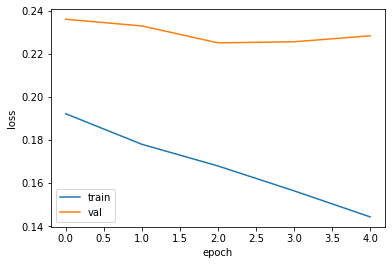

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [16]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 3s 7ms/step - loss: 0.2253 - accuracy: 0.9232


[0.22525760531425476, 0.9231666922569275]

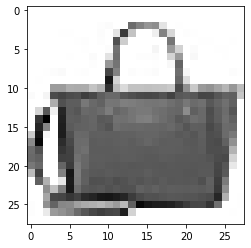

In [14]:
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

In [17]:
preds = model.predict(val_scaled[0:1])
print(preds)

[[1.0668252e-20 2.5575251e-32 7.3318095e-29 3.3804940e-29 1.0955191e-23
  1.0388668e-25 1.1677326e-22 3.1178311e-24 1.0000000e+00 4.2920477e-23]]


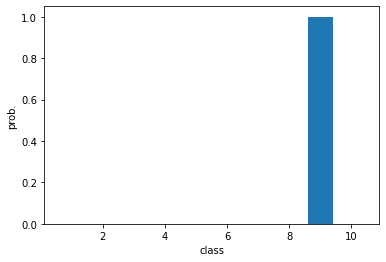

In [18]:
plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

In [19]:
classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

In [20]:
import numpy as np
print(classes[np.argmax(preds)])

가방


In [22]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [23]:
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 3s 9ms/step - loss: 0.2530 - accuracy: 0.9152


[0.2529701590538025, 0.9151999950408936]